# IMPORTING DEPENDENCIES

In [2]:
import mediapipe as mp
import cv2
import numpy as np


# INTSTANTIATING MEDIAPIPE SELFIE SEGMENTATION

In [3]:
mp_selfie = mp.solutions.selfie_segmentation

# TESTING MODEL IN REAL TIME

In [5]:
cap = cv2.VideoCapture(0)
# Create with statement for model 
with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
    while cap.isOpened():
        ret, fram = cap.read()
        frame = cv2.resize(fram, (1280,650))
        
        # Apply segmentation
        frame.flags.writeable = False
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = model.process(frame)
        frame.flags.writeable = True

        cv2.imshow('Webcam feed', frame)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [6]:
results.segmentation_mask


array([[1.2603667e-30, 1.2603667e-30, 1.2603667e-30, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5070405e-25, 7.5070405e-25, 7.5070405e-25, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [4.0079905e-24, 4.0079905e-24, 4.0079905e-24, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.2882243e-18, 1.2882243e-18, 1.2882243e-18, ..., 2.7108246e-01,
        2.7108246e-01, 2.7108246e-01],
       [2.2726583e-18, 2.2726583e-18, 2.2726583e-18, ..., 2.6602566e-01,
        2.6602566e-01, 2.6602566e-01],
       [2.4995396e-18, 2.4995396e-18, 2.4995396e-18, ..., 2.6486021e-01,
        2.6486021e-01, 2.6486021e-01]], dtype=float32)

# VISUALIZING RESULTS

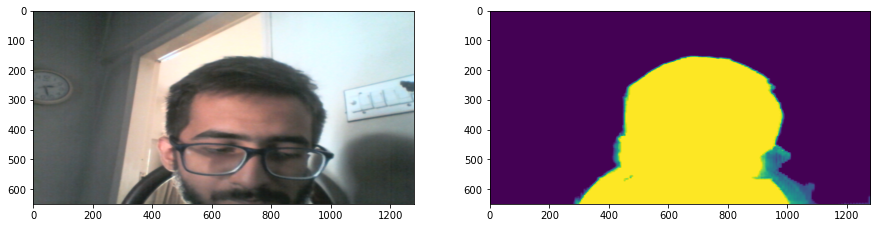

In [7]:
from matplotlib import pyplot as plt
from matplotlib import gridspec

# Layout
plt.figure(figsize=(15,15))
grid = gridspec.GridSpec(1,2)

# Setup axes
ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])

ax0.imshow(frame)
ax1.imshow(results.segmentation_mask)
plt.show()

# VISUALIZING STRIPPED SELFIE FROM BACKGROUND

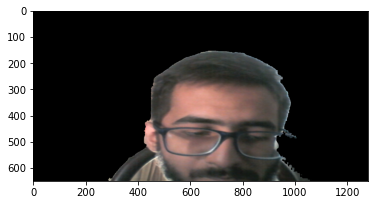

In [8]:
background = np.zeros(frame.shape, dtype=np.uint8)
mask = np.stack((results.segmentation_mask,)*3, axis=-1) > 0.5

segmented_image = np.where(mask, frame, background)

plt.imshow(segmented_image);

# BUILDING SELFIE SEGMENTATION MODEL IN REAL TIME

In [12]:
bg = cv2.imread('C:/users/moaaz/notebooks/SelfieSegmentationwithGradio-main/download.jpg')
bg1 = cv2.resize(bg, (1280,650), interpolation=cv2.INTER_LINEAR)

***This code will create an opencv feed where we can switch through three backgrounds by pressing "a", "s", "d" keys.***

In [13]:
cap = cv2.VideoCapture(0)
# Create with statement for model 
with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
    while cap.isOpened():
        ret, fram = cap.read()
        frame = cv2.resize(fram, (1280,650))
        
        frame.flags.writeable = False
        
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = model.process(frame)
        
        mask = np.stack((results.segmentation_mask,)*3, axis=-1) > 0.5 
        
      
        if cv2.waitKey(10) & 0xFF == ord('s'):
            bg = cv2.imread('C:/users/moaaz/notebooks/SelfieSegmentationwithGradio-main/download.jpg')
            bg1 = cv2.resize(bg, (1280,650), interpolation=cv2.INTER_LINEAR)
            
        elif cv2.waitKey(10) & 0xFF == ord('a'):
            bg = cv2.imread('C:/users/moaaz/notebooks/SelfieSegmentationwithGradio-main/download (1).jpg')
            bg1 = cv2.resize(bg, (1280,650), interpolation=cv2.INTER_LINEAR)
        
        elif cv2.waitKey(10) & 0xFF == ord('d'):
            bg = cv2.imread('C:/users/moaaz/notebooks/SelfieSegmentationwithGradio-main/GGG.jpg')
            bg1 = cv2.resize(bg, (1280,650), interpolation=cv2.INTER_LINEAR)
        
        imgs =  np.where(mask, frame, bg1)
        frame.flags.writeable = True
        final = cv2.cvtColor(imgs, cv2.COLOR_RGB2BGR)
        
        cv2.imshow('Webcam feed', final)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


# CREATING A GRADIO APP

In [ ]:
import gradio as gr
def segment(image): 
    with mp_selfie.SelfieSegmentation(model_selection=0) as model: 
    
       

        
        # background = np.zeros(frame.shape, dtype=np.uint8)
        res = model.process(image)
        mask = np.stack((res.segmentation_mask,)*3, axis=-1) > 0.5 
        
        random=np.random.randint(1,9)
        if random == 1 or random ==2 or random ==3:
            bg = cv2.imread('D:/download.jpg')
            bg1 = cv2.resize(bg, (1000, 1000), interpolation=cv2.INTER_LINEAR)
            # plt.imshow(cv2.cvtColor(bg1, cv2.COLOR_BGR2RGB));

        elif random==4 or random ==5:
            bg = cv2.imread('D:/download (1).jpg')
            bg1 = cv2.resize(bg, (1000, 1000), interpolation=cv2.INTER_LINEAR)
            # plt.imshow(cv2.cvtColor(bg1, cv2.COLOR_BGR2RGB))

        else:
            bg = cv2.imread('D:/images.jpg')
            bg1 = cv2.resize(bg, (1000, 1000), interpolation=cv2.INTER_LINEAR)
            # plt.imshow(cv2.cvtColor(bg1, cv2.COLOR_BGR2RGB));
        # return np.where(mask, image, cv2.blur(image, (40,40)))
        
        return np.where(mask, image, bg1)

webcam = gr.inputs.Image(shape=(1000, 1000), source="webcam")

webapp = gr.interface.Interface(fn=segment, inputs=webcam, outputs="image")

webapp.launch(share=True)

C:\Users\moaaz\anaconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861/
Running on public URL: https://35205.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x15ef7ad33d0>,
 'http://127.0.0.1:7861/',
 'https://35205.gradio.app')

Exception in callback None(<Task finishe...> result=None>)
handle: <Handle>
Traceback (most recent call last):
  File "C:\Users\moaaz\anaconda3\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
TypeError: 'NoneType' object is not callable
